# BL40A2030 Wireless Communication Networks

## Week 6 - Assignment

### Author: Jesse Peltola

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib import style
import math
#style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

**1. (Poisson Point Process) Consider a given region with area $A = 100$ m^2.**

(a) Simulate and plot the histogram of number of points in this area $A$ considering that the density of point is $\lambda = 0.2$ points/m^2.

(b) Compare the simulated histogram with the analytical Poisson distribution.

(c) Present a snapshot of this Point process of this area considering that it is a square with side lenght $L=10$ m.

*Hint: In (a) and (b) there is no need to simulate the position, only the number of points; use the following to define the correct number of bins in the histogram: n_bins = np.max(samples_mean)-np.min(samples_mean) [check tutorial from week 2]. In (c), one snapshot is enough.* 


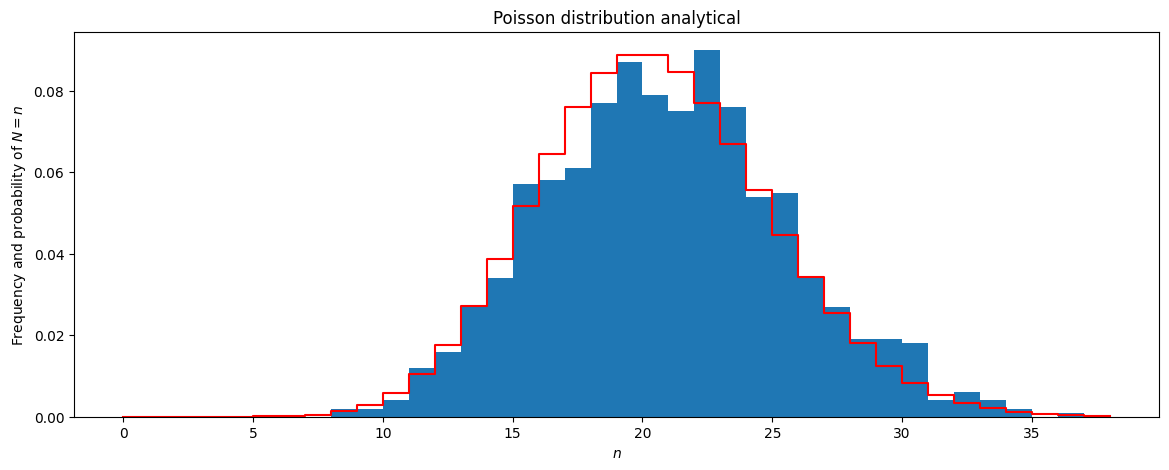

In [6]:
#a)

A = 100 #100m^2

mean = 0.2 * 100 #As we know that A 100/m^2 so mean is 100 times of 0.2
trials = 1000

sample_means2 = np.random.poisson(mean, trials)
n_bins2 = np.max(sample_means2) - np.min(sample_means2)

x = np.arange(0, ss.poisson.ppf(0.9999, mean))
analytical = ss.poisson.pmf(x, mean)
plt.figure(figsize=(14, 5))
plt.hist(sample_means2, n_bins2, density=True)
plt.step(analytical, 'r', where='post')
plt.xlabel("$n$")
plt.ylabel('Frequency and probability of $N = n$')
plt.title('Poisson distribution analytical')
plt.show()

b) 

The analytical poisson distribution is close to simulated poisson distribution but there is some difference. One reason is the low number of trials, so they would be closer to matching each other by increasing the number of trials.

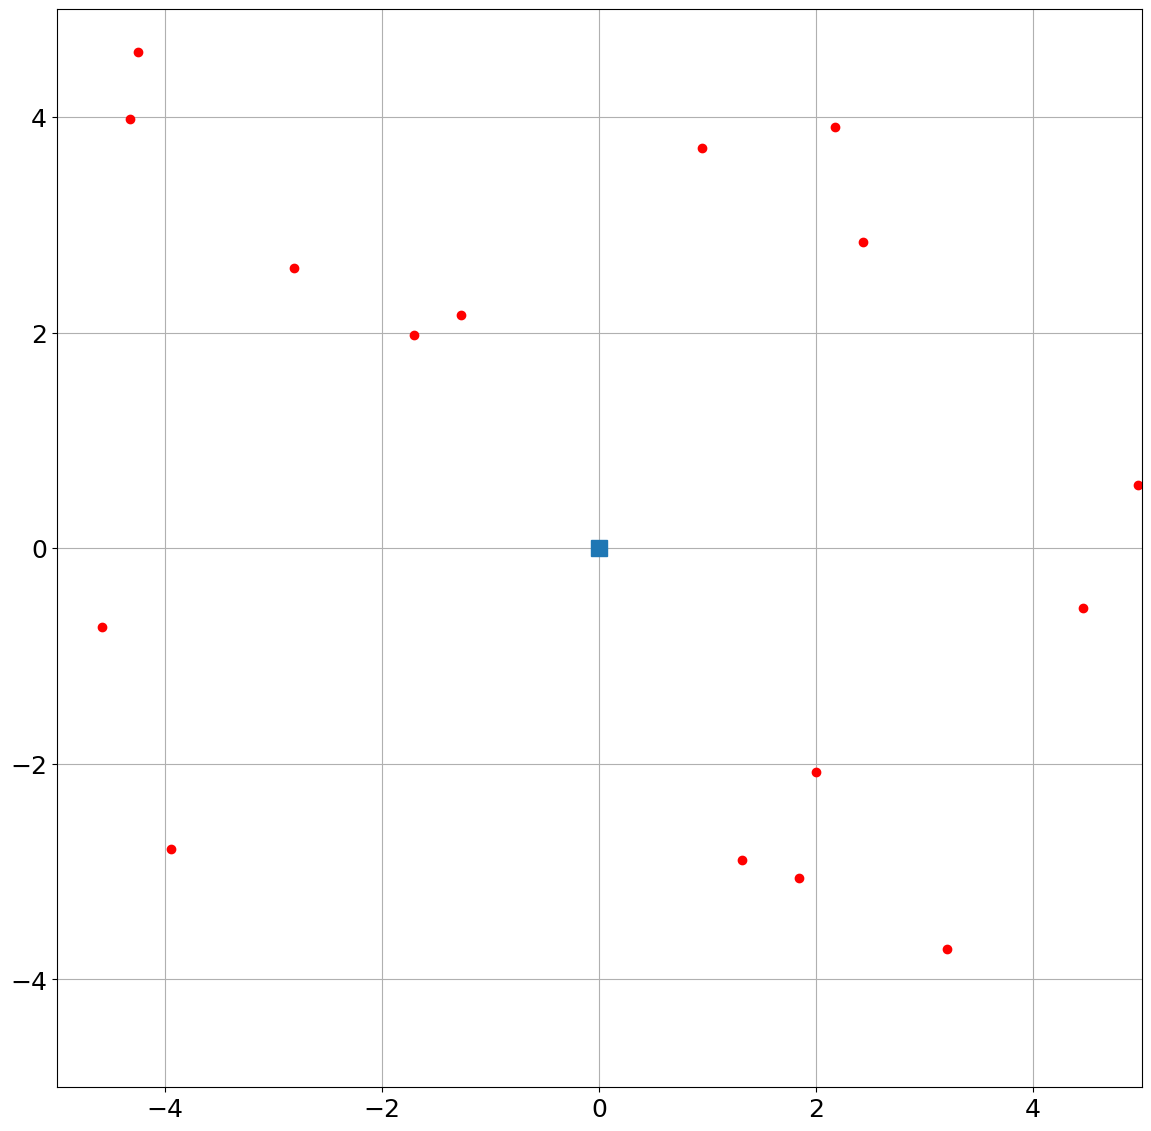

In [10]:
#c) 

# Generate random points within the square

L = 10

mean_poisson = 0.2

num_points = np.random.poisson(mean_poisson * A)

#
#Uniform distribution in x
position_x_realization = np.random.uniform(-L/2,L/2,num_points)

#Uniform distribution in y
position_y_realization = np.random.uniform(-L/2,L/2,num_points)

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14, 14))
plt.plot(position_x_realization, position_y_realization, 'r o')
plt.plot(0, 0, 's',markersize=12)
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)
plt.grid()
plt.show()





**2. (Closest-neighbor bound) During this week, the closest neighbor lower-bound of the outage probability when was presented.** 



(a) What is the outage event and what is the meaning of this outage probability? 

In this scenario, an outage event is simply a binary occurrence, either true or false, determined by whether the simplified power capture model produces a value below a certain threshold. The outage probability is then calculated by comparing this value to the reference receiver for each run of the model. It's important to note that each trial in this process is separate and doesn't depend on the outcome of previous trials.

(b) Explain why the closest-neighbor is a lower bound of the outage probability?

The closest-neighbor is a lower bound of the outage probability because the receiver will have the strongest signal if there is no packet loss. Therefore, the closest-neighbor serves as a lower bound of the outage probability due to its relationship with local density estimation and its informative nature in error rate evaluation.


*Hint: (a) Remember that the Spatial Point Process analysis characterizes events and their probabilities over different spatial realizations*

(c) Adapt the code provided in the tutorial to validate the bound as a function of $1< \beta <6$ considering $\lambda = 0.04$ (density of interferers in nodes per m^2), $d=1.5$, $\alpha = 4$.



In [7]:
### Outage probability with Rayleigh
### Analytical - closed-form
def out_ray(d,beta,alpha,L,mean_poisson):
    kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
    return 1 - np.exp(-kappa * mean_poisson/L**2 * d**2 * np.pi * beta**(2/alpha))

In [5]:
### Probability of successful transmission = 1 -outage probability
### Simulation
def suc_prob_ray(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [np.random.exponential(1)*distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < np.random.exponential(1) * d**(-alpha): 
            success = success + 1
    return success/trials

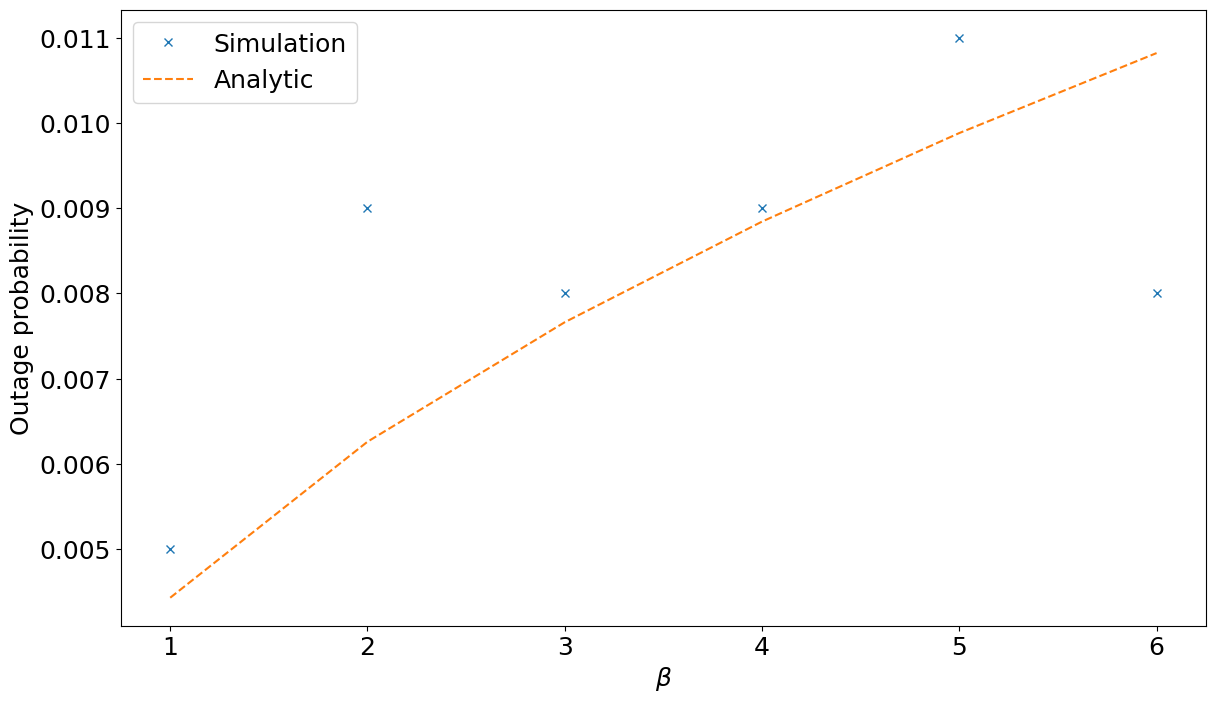

In [10]:
d = 1.5
beta = range(1,7)
alpha = 4
L = 100
#simulation
trials = 1000

out_simul = []
out_simul = [1 - suc_prob_ray(d, i, alpha, L, mean_poisson=0.04*L, trials=trials) for i in beta]

#Lower-bound
out_lb_ana = []
out_lb_ana = [out_ray(d,i,alpha,L,mean_poisson=0.04*L) for i in beta]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(beta, out_simul, 'x' , label='Simulation')
plt.plot(beta,out_lb_ana , '--' , label='Analytic')
plt.xlabel("$\\beta$")
plt.ylabel("Outage probability")
plt.legend()
plt.show()




**3. (Performance analysis) Aggregate Information Efficiency for the bipolar networks:  $\lambda \times d \times (1-P_o) \times \log_2(1+\beta)$**

(a) Plot the AIE as a function of $1 < \beta <6$ with $d=1.5$, $\alpha = 4$, and $\lambda = 0.05$.

(b) Plot the AIE as a function of $1 < d < 6$ with $\beta= 3$, $\alpha = 4$, and $\lambda = 0.01$.

(c) Plot the AIE as a function of $0.001 < \lambda<0.1$ with $d=1.5$, $\alpha = 4$, and $\beta= 3$.

(d) Comment the trade-offs captured by this metric based on the items (a)-(c).

*Hint: No need to simulate, only plot the mathematical formulation.*

In [24]:
def calculate_aggre_efficiency(alpha, kappa, lamb, d, beta):
    return lamb *  d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta)
    

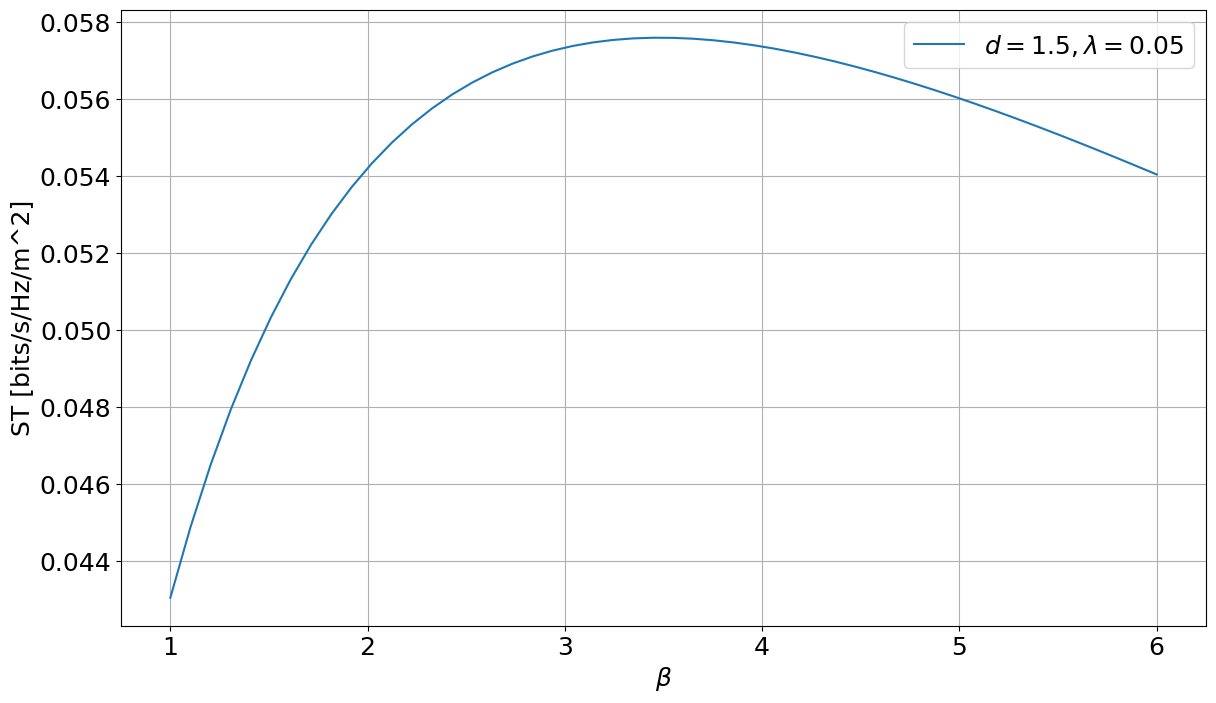

In [34]:
#Path-loss
alpha=4
#Constant from Rayleigh fading 
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)


#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

#a)
beta = np.linspace(1, 6)
agg_info_eff = [calculate_aggre_efficiency(alpha, kappa, 0.05, 1.5, i) for i in beta]
plt.plot(beta, agg_info_eff, '-' ,label=r'$d=1.5, \lambda=0.05$')


plt.xlabel("$\\beta$")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

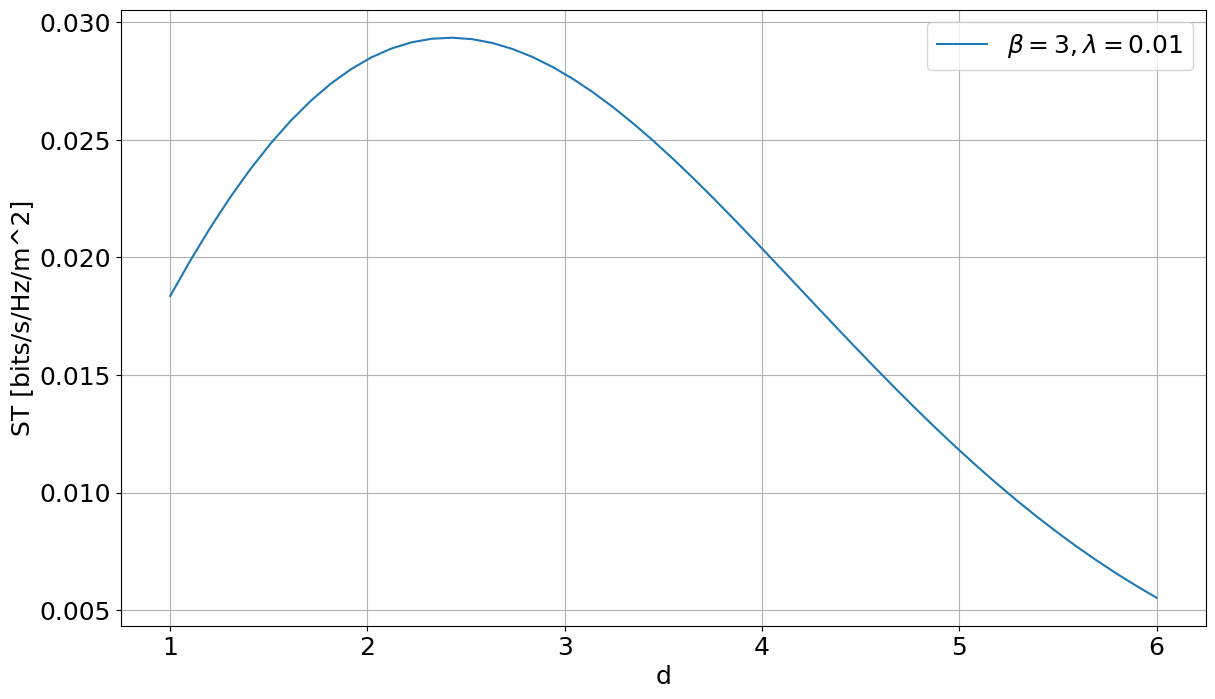

In [35]:

#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
#b)
d = np.linspace(1,6)
agg_info_eff = [calculate_aggre_efficiency(alpha, kappa, 0.01, i, 3) for i in d]
plt.plot(d, agg_info_eff, '-' ,label=r'$\beta=3, \lambda=0.01$')

plt.xlabel("d")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()



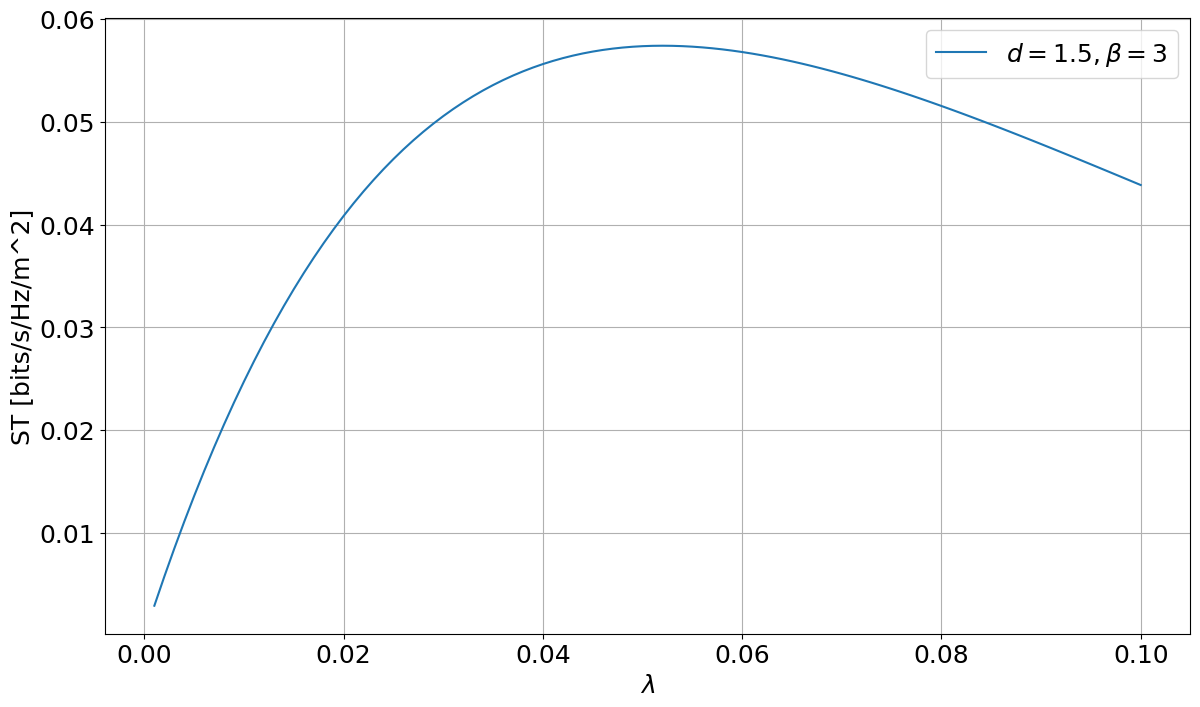

In [37]:
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
#c)
lamb = np.linspace(0.001,0.1, 100)
agg_info_eff = [calculate_aggre_efficiency(alpha, kappa, i, 1.5, 3) for i in lamb]
plt.plot(lamb, agg_info_eff, '-' ,label=r'$d=1.5, \beta = 3$')

plt.xlabel("$\\lambda$")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()